In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import pandas as pd

import torchvision

In [3]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV

In [4]:
#Validation function
n_folds = 10

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train.values)
    rmse= np.sqrt(-cross_val_score(model, x_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [5]:
import data_pipeline as dp
from data_pipeline.data_preprocessor import PreProcessor as pp
# load train set, test set


x_train, y_train, x_test, y_test = pp("total_data.csv").process()
# print(X_train[0], Y_train[0])

# x_train = Variable(torch.tensor(X_train.value))
# y_train = Variable(torch.tensor(Y_train.value))
y_train

19082    0.352559
6195     1.035144
19333    0.532645
22011    0.400095
20807    0.665325
           ...   
14067   -0.425806
15399   -0.135849
3377     1.597502
12295   -0.838654
1501     0.886088
Name: latency, Length: 17014, dtype: float64

In [6]:
# -----------------------------------------------------------------

In [7]:
# lasso regression

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [8]:
# ElasticNet regression 

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [9]:
# kernel Ridge regression

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [10]:
# Gradient Boosting Regression

GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [11]:
# LGB Regressor

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [12]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0, 1"


In [13]:
# XGBoost Algorithm (without GridSearch)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.05, 
                             learning_rate=0.1, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=500,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =3, nthread = -1)

In [14]:
# SVR with GridSearch

model_svr = SVR(C=1, cache_size=200, coef0=0, degree=3, epsilon=0.0, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


#grid_search.best_estimator_

In [15]:
# Random Forest Regressor with GridSearch


regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=150, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=90, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

#grid_search.best_estimator_

In [16]:
# -----------------------------------------------------

In [17]:
# lasso score
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.2634 (0.0216)



In [18]:
# ElasticNet score
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.2634 (0.0216)



In [19]:
# Kernel Rigde score
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2340 (0.0169)



In [20]:
# Gradient Boosting score
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1812 (0.0078)



In [21]:
# Light GBM score
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1844 (0.0062)



In [22]:
# XGBoost score
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1671 (0.0061)



In [23]:
# SVR score 
score = rmsle_cv(model_svr)
print("SVR score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

SVR score: 0.2962 (0.0103)



In [26]:
#define a rmsle evaluation function

def rmsle(y, y_pred): 
    return np.sqrt(mean_squared_error(y, y_pred))

def rmse(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_test, y_pred = inverse_latency(y_test), inverse_latency(y_pred)
    return np.sqrt(mean_squared_error(y_test, y_pred))

In [29]:
model_xgb.fit(x_train, y_train)
model_lgb.fit(x_train, y_train)
GBoost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=15, min_samples_split=10,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=5, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:

from joblib import load
def inverse_latency(X):
    robust, quantile = load("robust.pkl"), load("quantile.pkl")
    if isinstance(X, pd.Series):
        X = X.values.reshape(-1, 1)
    else:
        X = X.reshape(-1, 1)
    return robust.inverse_transform(quantile.inverse_transform(X)).reshape(-1)

In [38]:

print("Gradient Boosting rmse: {}".format(rmse(GBoost, x_test, y_test)))
print("LGBM rmse : {}".format(rmse(model_lgb, x_test, y_test)))
print("Xgboost rmse : {}".format(xgb, x_test, y_test))
# print("Random Forest rmse : {}".format(forest_reg, X_test, Y_test))

Gradient Boosting rmse: 28643.118606991502
LGBM rmse : 19026.60337354742
Xgboost rmse : <module 'xgboost' from '/nfs/home/kit7777777t/anaconda3/envs/LENNA/lib/python3.6/site-packages/xgboost/__init__.py'>


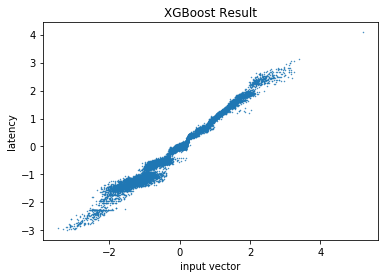

In [50]:
plt.scatter(y_train, xgb_train_pred, s=0.2)
plt.xlabel('input vector')
plt.ylabel('latency')
plt.title('XGBoost Result')
plt.show()

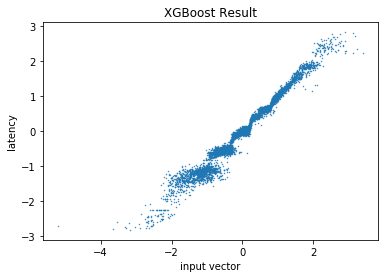

In [49]:
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = model_xgb.predict(x_test)

#plt.plot(x_test, y_test)
plt.scatter(y_test, xgb_pred, s=0.2)
plt.xlabel('input vector')
plt.ylabel('latency')
plt.title('XGBoost Result')
plt.show()

In [ ]:
# ----------------------절취선---------------------------

In [ ]:
# XGBoost

model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(X_test))
print(rmsle(X_test, xgb_train_pred))
print()

In [ ]:
# LightGBM

model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

In [ ]:
GBoost.fit(x_train,y_train)
GB_train_pred = GBoost.predict(x_train)
GB_pred = np.expm1(GBoost.predict(x_test.values))
print(rmsle(y_train, GB_train_pred))

In [ ]:
ENet.fit(x_train,y_train)
ENet_train_pred = ENet.predict(x_train)
ENet_pred = np.expm1(ENet.predict(x_test.values))
print(rmsle(y_train, ENet_train_pred))

In [ ]:
print("Lasso rmse: {}".format(rmse(lasso, X_test, Y_test)))
print("ElasticNet rmse: {}".format(rmse(ENet, X_test, Y_test)))
print("Kernel Ridge rmse: {}".format(rmse(KRR, X_test, Y_test)))
print("Gradient Boosting rmse: {}".format(rmse(GBoost, X_test, Y_test)))
print("LGBM rmse : {}".format(rmse(model_lgb, X_test, Y_test)))
print("Xgboost rmse : {}".format(xgb, X_test, Y_test))
print("SVR rmse : {}".format(model_svr, X_test, Y_test))
print("Random Forest rmse : {}".format(forest_reg, X_test, Y_test))